# Data Wrangling
    1) Explore dataset 
    2) Data preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None # show all columns in cell

In [2]:
# Gather the data
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv', sep=';')

/Users/jiaqis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.shape

(891221, 366)

In [4]:
customers.shape # customer date 3 more columns for customer type

(191652, 369)

## Data Explore I: Date type
**Pandas deliver a warning message, so need to check datatype of each column and find mixed types.**

In [5]:
azdias.dtypes[azdias.dtypes==object] # mixed type is read as object

CAMEO_DEU_2015              object
CAMEO_DEUG_2015             object
CAMEO_INTL_2015             object
D19_LETZTER_KAUF_BRANCHE    object
EINGEFUEGT_AM               object
OST_WEST_KZ                 object
dtype: object

### Data Preprocessing I: Convert mixed type

In [6]:
# Map categorical value(1A,1B,2A, etc.) to numerical value
CAMEO_DEU_2015_value = azdias.groupby(['CAMEO_DEU_2015']).count()['LNR'].index
CAMEO_DEU_2015_value_map = {}
for i, item in enumerate(CAMEO_DEU_2015_value):
    # Conside XX as missing value, fill with 0
    if item== 'XX':
        CAMEO_DEU_2015_value_map[item] = 0
    else:
        CAMEO_DEU_2015_value_map[item] = i + 1        

In [7]:
azdias['CAMEO_DEU_2015'] = azdias['CAMEO_DEU_2015'].apply(lambda x: CAMEO_DEU_2015_value_map.get(x))
azdias['CAMEO_DEU_2015'].fillna(0, inplace=True)

In [8]:
# Conside X as missing value, fill with 0
azdias['CAMEO_DEUG_2015'] = np.where(azdias['CAMEO_DEUG_2015']=='X', 0, azdias['CAMEO_DEUG_2015'])
azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].astype('float')
azdias['CAMEO_DEUG_2015'].fillna(0, inplace=True)

In [9]:
# Conside XX as missing value, fill with 0
azdias['CAMEO_INTL_2015'] = np.where(azdias['CAMEO_INTL_2015']=='XX', 0, azdias['CAMEO_INTL_2015'])
azdias['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].astype('float')
azdias['CAMEO_INTL_2015'].fillna(0, inplace=True)

In [10]:
# Already has encoded columns contain branch info.
azdias.drop(['D19_LETZTER_KAUF_BRANCHE'], axis=1, inplace=True)

In [11]:
# Only keep year
azdias['EINGEFUEGT_AM'] = pd.to_datetime(azdias['EINGEFUEGT_AM']).dt.year
azdias['EINGEFUEGT_AM'].fillna(azdias['EINGEFUEGT_AM'].mode()[0], inplace=True)

In [12]:
# Map O and W to 1 and 2, fill Nan with 0
azdias['OST_WEST_KZ'] = np.where(
    azdias['OST_WEST_KZ']=='O',
    1,
    np.where(azdias['OST_WEST_KZ']=='W', 2, 0)
)

In [13]:
azdias.dtypes[azdias.dtypes==object]

Series([], dtype: object)

## Data Explore II: Missing Value
**Checking missing percentage and group column with same missing rate.**

In [14]:
azdias_missing_percent = (azdias.isna().sum(axis=0)/azdias.shape[0])

In [15]:
azdias_missing_percent = azdias_missing_percent.rename('missing_percent').reset_index()

In [16]:
azdias_missing_percent = azdias_missing_percent.groupby('missing_percent')['index'] \
                          .apply(lambda x: list(x)) \
                          .reset_index() \
                          .sort_values(['missing_percent'], ascending=False).reset_index(drop=True)

In [17]:
azdias_missing_percent['attribute_cnt'] = azdias_missing_percent['index'].apply(lambda x:len(x))

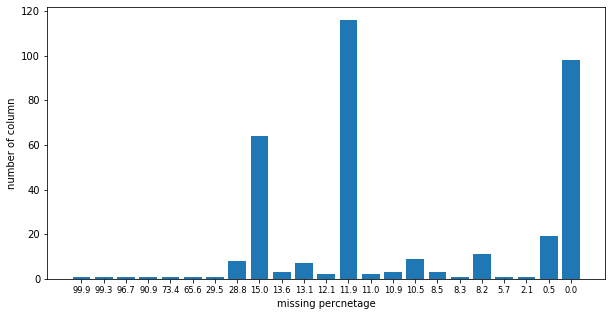

In [18]:
plt.figure(figsize=(10,5))
plt.bar(
    x=azdias_missing_percent['missing_percent'].apply(lambda x: round(x*100,1)).astype('str'),
    height=azdias_missing_percent['attribute_cnt']
)
plt.xlabel('missing percnetage')
plt.xticks(fontsize='small')
plt.ylabel('number of column')
plt.show()

### Data Preprocessing II: Fill missing value

- #### Kids' age has too many missing value, so combine these four variable to create kid number variable.

In [19]:
kind_col = ['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4']
for col in kind_col:
    azdias[col] = np.where(azdias[col]>0, 1, 0)
    
azdias['ALTER_KIND'] = (azdias['ALTER_KIND1'] + azdias['ALTER_KIND2']
                        + azdias['ALTER_KIND3'] + azdias['ALTER_KIND4'])
azdias.drop(kind_col, axis=1, inplace = True)  

In [20]:
azdias.groupby(['ALTER_KIND']).count()['LNR']   

ALTER_KIND
0    810163
1     51559
2     23329
3      4965
4      1205
Name: LNR, dtype: int64

- #### Drop columns contain more than 50% missing value.

In [ ]:
azdias.drop(['EXTSEL992', 'KK_KUNDENTYP'], axis=1, inplace = True)  

- #### Fillna with 0.

In [ ]:
azdias.fillna(0, inplace=True)

- #### Check missing value.

In [ ]:
azdias_missing_percent = (azdias.isna().sum(axis=0)/azdias.shape[0])

In [ ]:
azdias_missing_percent[azdias_missing_percent>0]

## Data Explore III: Data Distribution
**Checking max and min to find Abnormalities.**

In [136]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,K

### Data Preprocessing III: Outlier

In [104]:
def draw_dsitribution(i):
    plot_df = azdias[[col for col in azdias.columns][i:i+4]].copy()
    fig = plt.figure(figsize=(8,6))
    plot_df.hist()
    plt.show()
    return fig

After review the distribution plot, we found that the following columns contain outliers:
 
 - 'ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb555f787f0>,
      dtype=object)

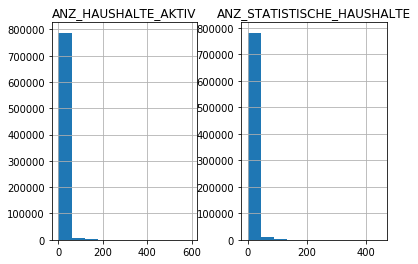

In [160]:
outlier_cols = ['ANZ_HAUSHALTE_AKTIV', 'ANZ_STATISTISCHE_HAUSHALTE']
azdias.hist(column=outlier_cols)

In [161]:
for col in outlier_cols:
    azdias[col] = np.where(azdias[col]>9, 9, azdias[col])

### Data Preprocessing V: Drop column with little variance

In [ ]:
mode = azdias.mode(axis=0).iloc[0,:].t

In [ ]:
mode

### Appendix

<Figure size 576x432 with 0 Axes>

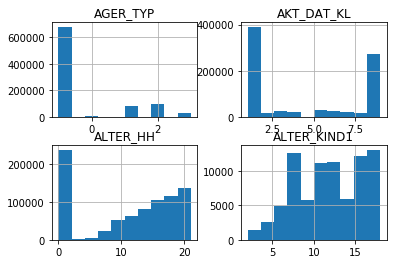

1


<Figure size 576x432 with 0 Axes>

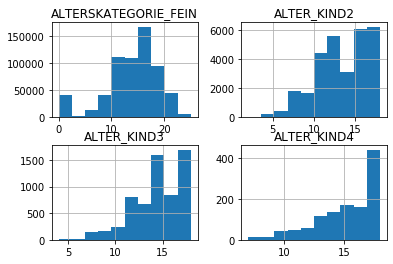

5


<Figure size 576x432 with 0 Axes>

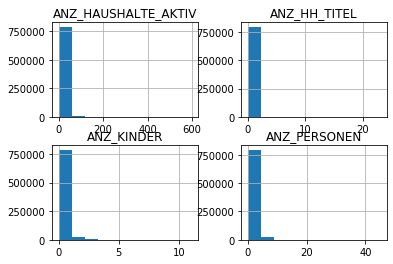

9


<Figure size 576x432 with 0 Axes>

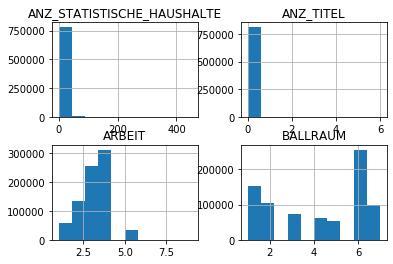

13


<Figure size 576x432 with 0 Axes>

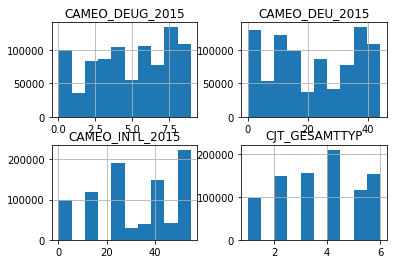

17


<Figure size 576x432 with 0 Axes>

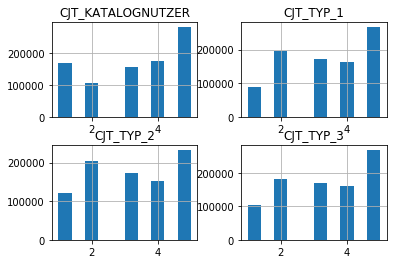

21


<Figure size 576x432 with 0 Axes>

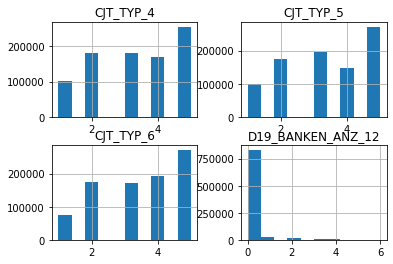

25


<Figure size 576x432 with 0 Axes>

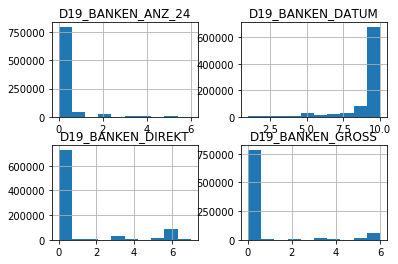

29


<Figure size 576x432 with 0 Axes>

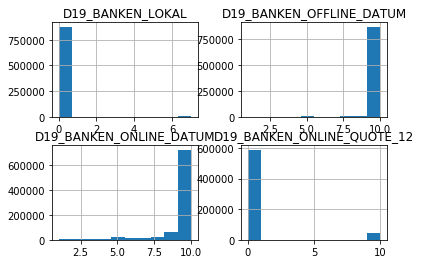

33


<Figure size 576x432 with 0 Axes>

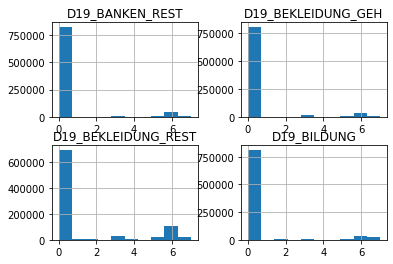

37


<Figure size 576x432 with 0 Axes>

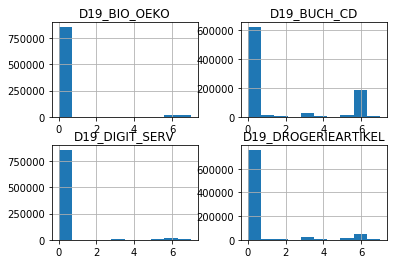

41


<Figure size 576x432 with 0 Axes>

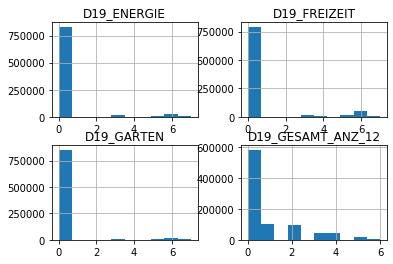

45


<Figure size 576x432 with 0 Axes>

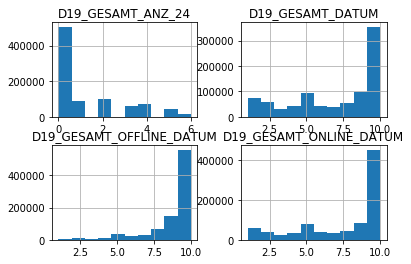

49


<Figure size 576x432 with 0 Axes>

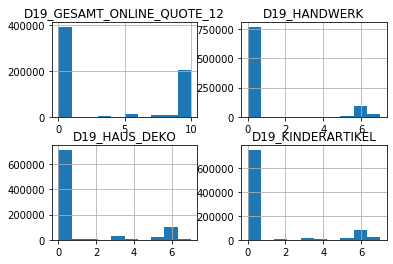

53


<Figure size 576x432 with 0 Axes>

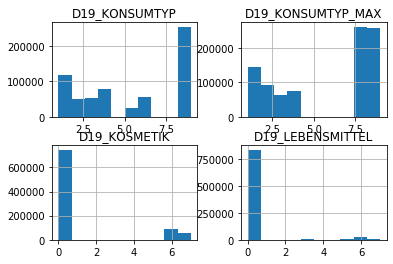

57


<Figure size 576x432 with 0 Axes>

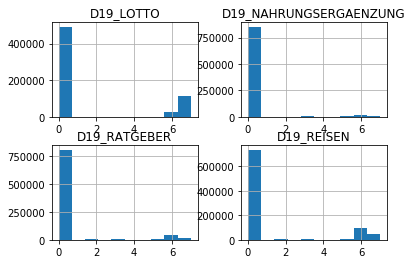

61


<Figure size 576x432 with 0 Axes>

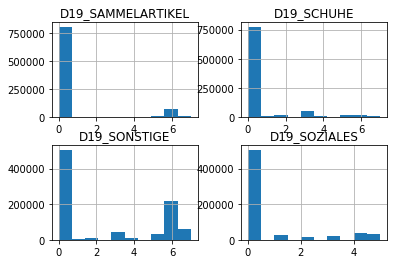

65


<Figure size 576x432 with 0 Axes>

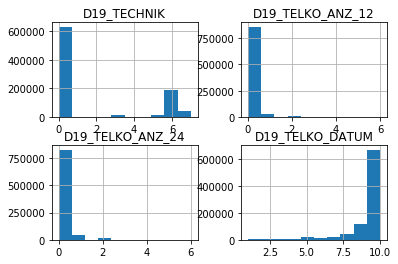

69


<Figure size 576x432 with 0 Axes>

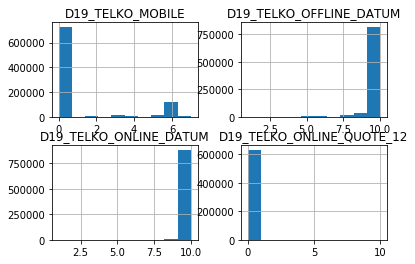

73


<Figure size 576x432 with 0 Axes>

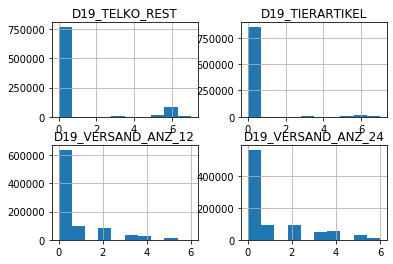

77


<Figure size 576x432 with 0 Axes>

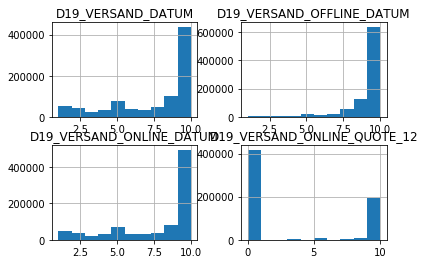

81


<Figure size 576x432 with 0 Axes>

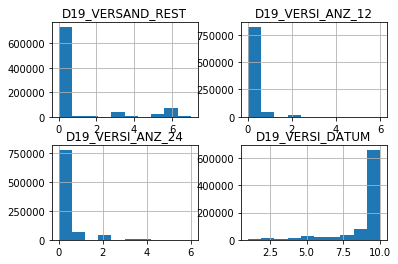

85


<Figure size 576x432 with 0 Axes>

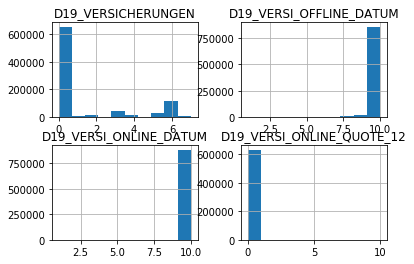

89


<Figure size 576x432 with 0 Axes>

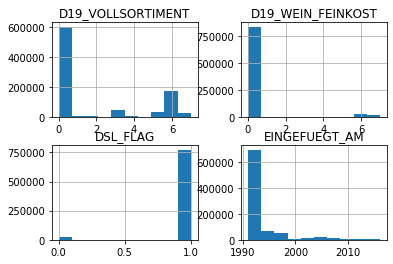

93


<Figure size 576x432 with 0 Axes>

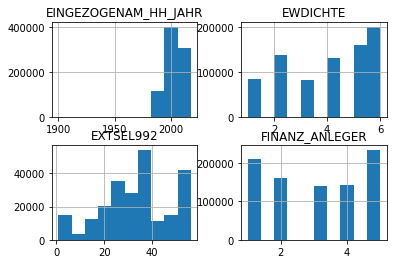

97


<Figure size 576x432 with 0 Axes>

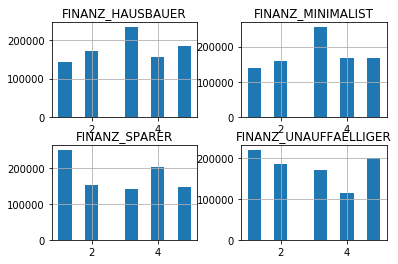

101


<Figure size 576x432 with 0 Axes>

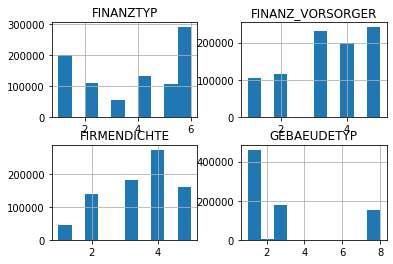

105


<Figure size 576x432 with 0 Axes>

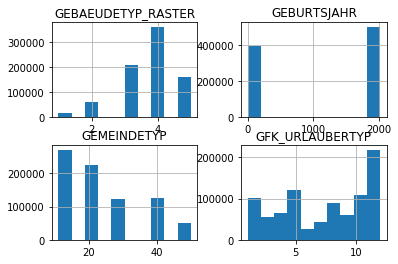

109


<Figure size 576x432 with 0 Axes>

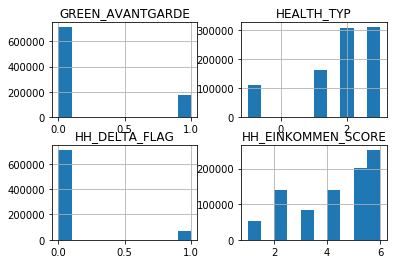

113


<Figure size 576x432 with 0 Axes>

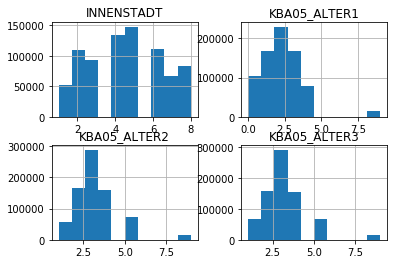

117


<Figure size 576x432 with 0 Axes>

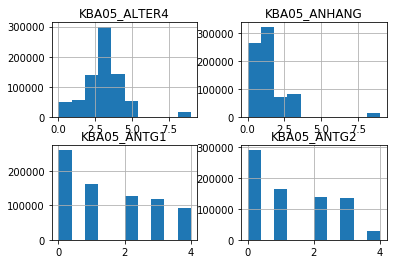

121


<Figure size 576x432 with 0 Axes>

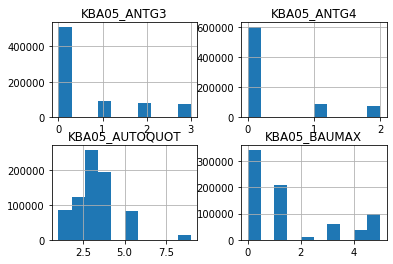

125


<Figure size 576x432 with 0 Axes>

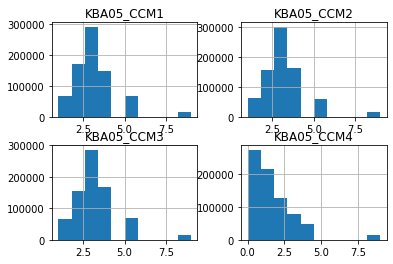

129


<Figure size 576x432 with 0 Axes>

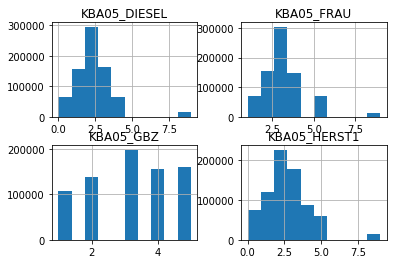

133


<Figure size 576x432 with 0 Axes>

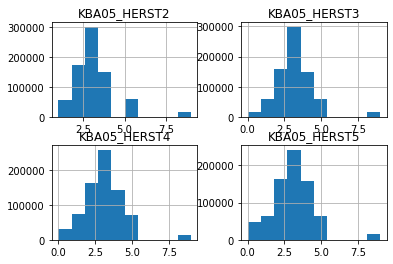

137


<Figure size 576x432 with 0 Axes>

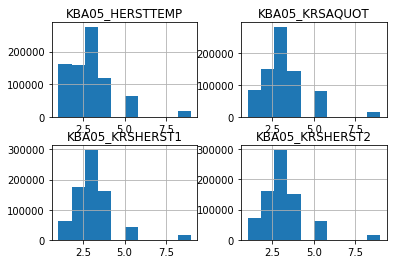

141


<Figure size 576x432 with 0 Axes>

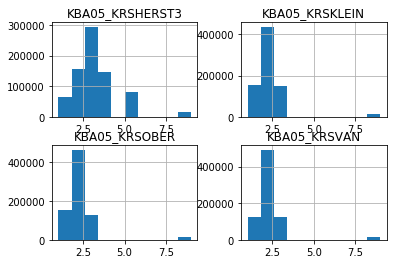

145


<Figure size 576x432 with 0 Axes>

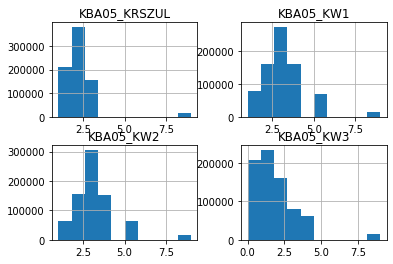

149


<Figure size 576x432 with 0 Axes>

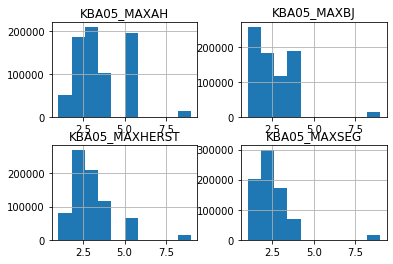

153


<Figure size 576x432 with 0 Axes>

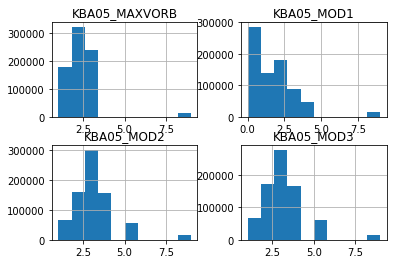

157


<Figure size 576x432 with 0 Axes>

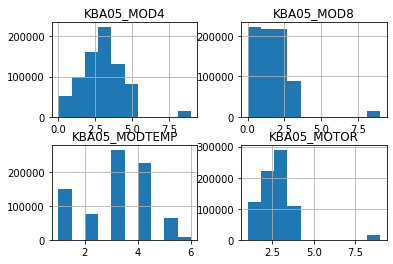

161


<Figure size 576x432 with 0 Axes>

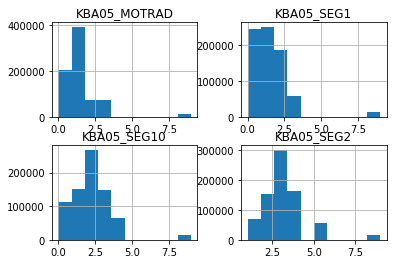

165


<Figure size 576x432 with 0 Axes>

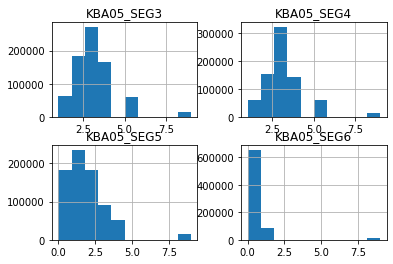

169


<Figure size 576x432 with 0 Axes>

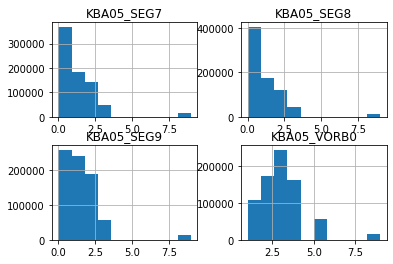

173


<Figure size 576x432 with 0 Axes>

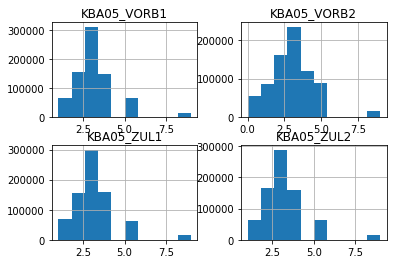

177


<Figure size 576x432 with 0 Axes>

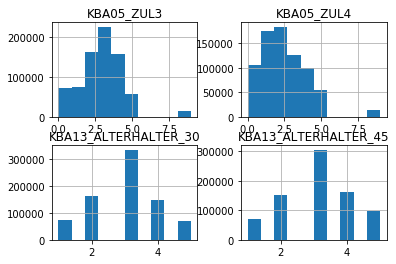

181


<Figure size 576x432 with 0 Axes>

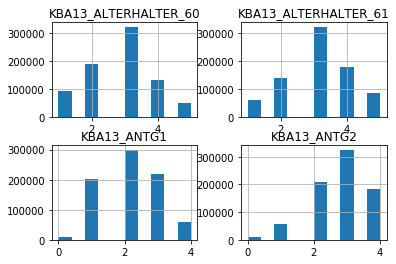

185


<Figure size 576x432 with 0 Axes>

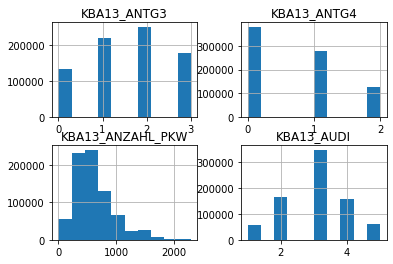

189


<Figure size 576x432 with 0 Axes>

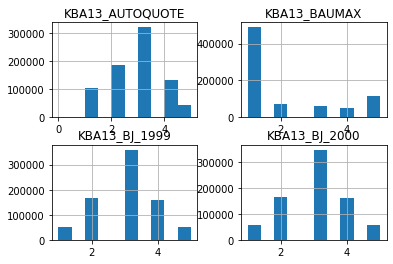

193


<Figure size 576x432 with 0 Axes>

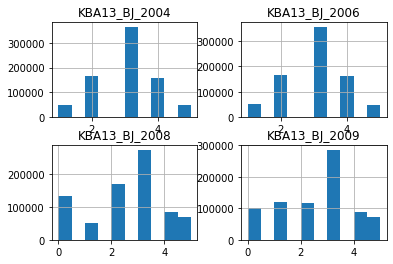

197


<Figure size 576x432 with 0 Axes>

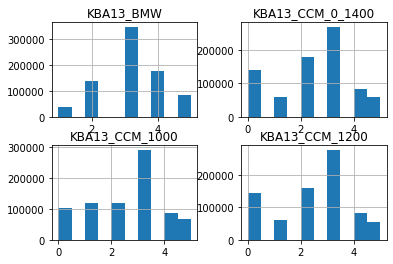

201


<Figure size 576x432 with 0 Axes>

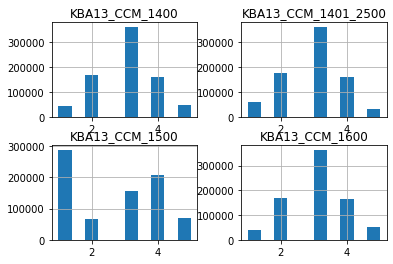

205


<Figure size 576x432 with 0 Axes>

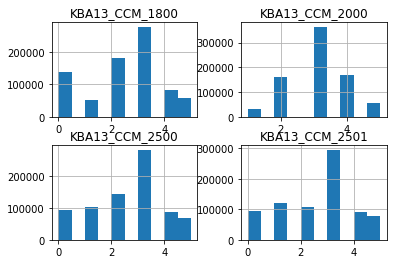

209


<Figure size 576x432 with 0 Axes>

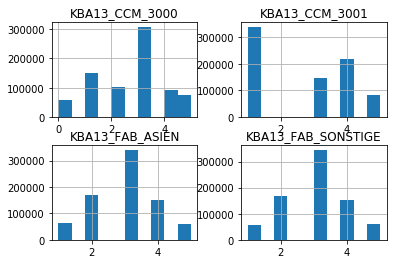

213


<Figure size 576x432 with 0 Axes>

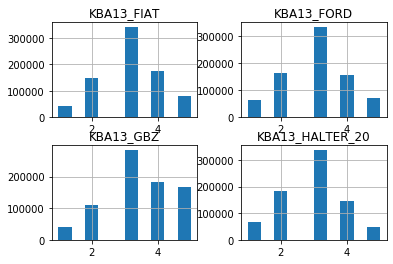

217


<Figure size 576x432 with 0 Axes>

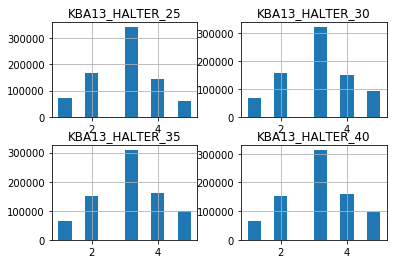

221


<Figure size 576x432 with 0 Axes>

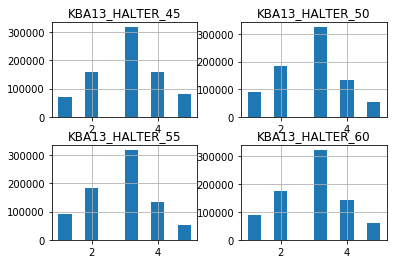

225


<Figure size 576x432 with 0 Axes>

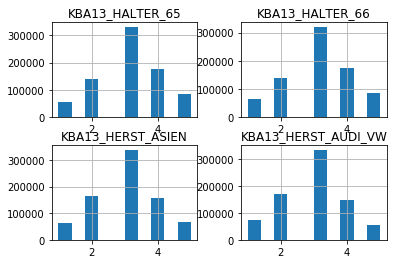

229


<Figure size 576x432 with 0 Axes>

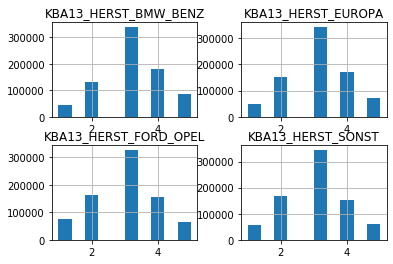

233


<Figure size 576x432 with 0 Axes>

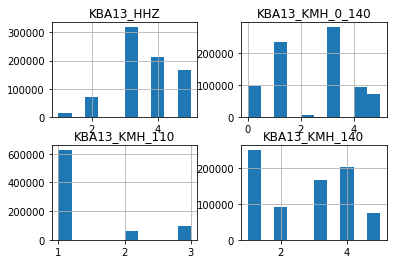

237


<Figure size 576x432 with 0 Axes>

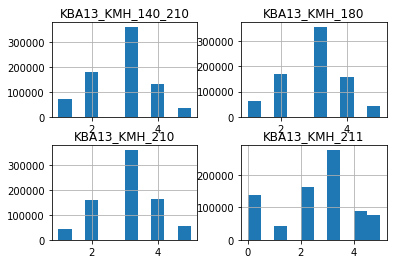

241


<Figure size 576x432 with 0 Axes>

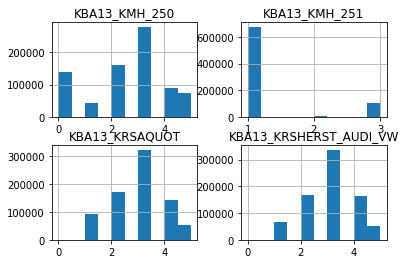

245


<Figure size 576x432 with 0 Axes>

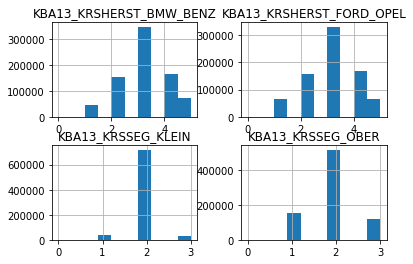

249


<Figure size 576x432 with 0 Axes>

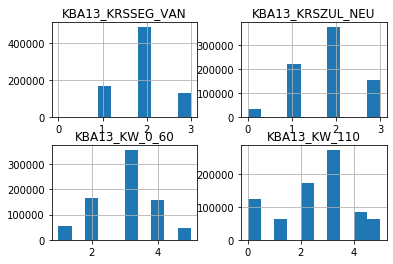

253


<Figure size 576x432 with 0 Axes>

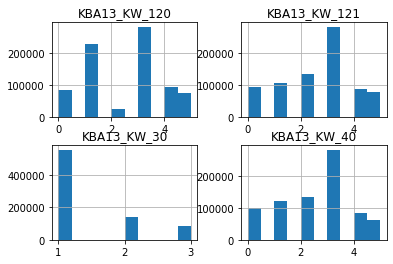

257


<Figure size 576x432 with 0 Axes>

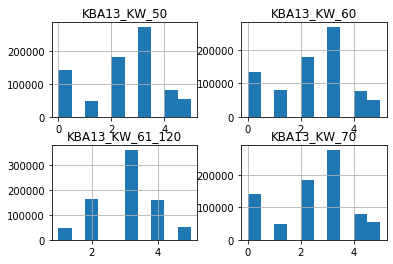

261


<Figure size 576x432 with 0 Axes>

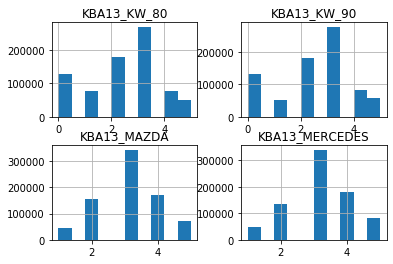

265


<Figure size 576x432 with 0 Axes>

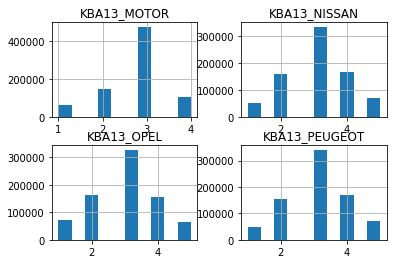

269


<Figure size 576x432 with 0 Axes>

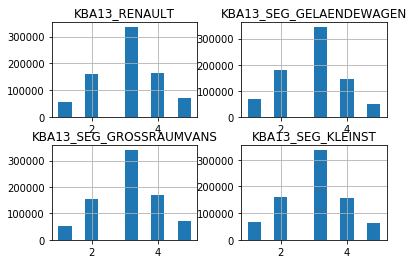

273


<Figure size 576x432 with 0 Axes>

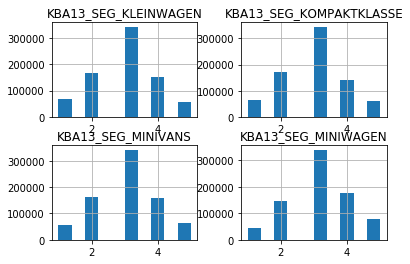

277


<Figure size 576x432 with 0 Axes>

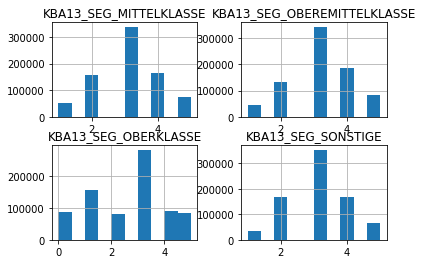

281


<Figure size 576x432 with 0 Axes>

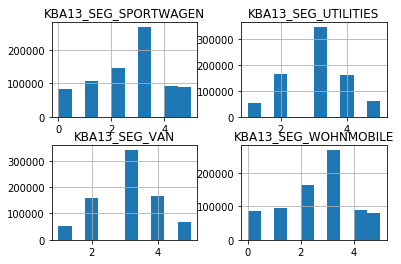

285


<Figure size 576x432 with 0 Axes>

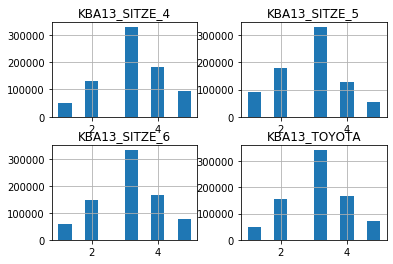

289


<Figure size 576x432 with 0 Axes>

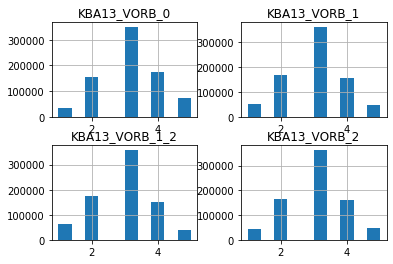

293


<Figure size 576x432 with 0 Axes>

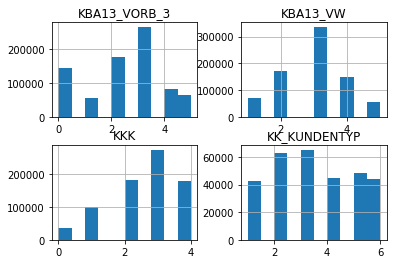

297


<Figure size 576x432 with 0 Axes>

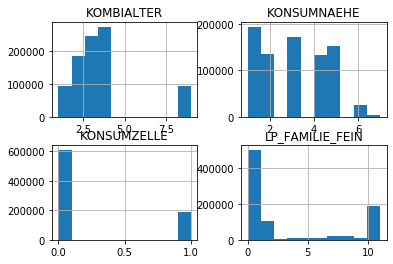

301


<Figure size 576x432 with 0 Axes>

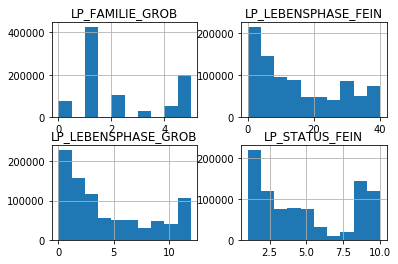

305


<Figure size 576x432 with 0 Axes>

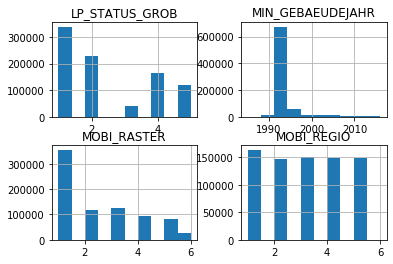

309


<Figure size 576x432 with 0 Axes>

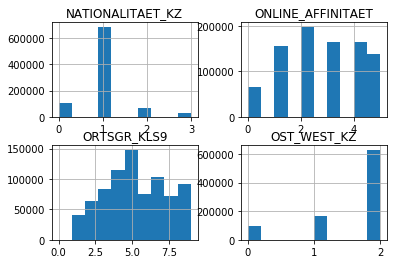

313


<Figure size 576x432 with 0 Axes>

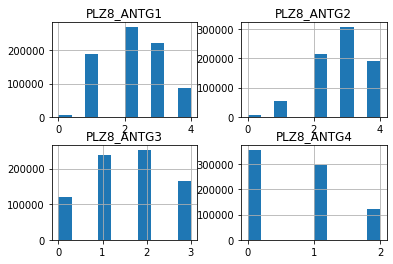

317


<Figure size 576x432 with 0 Axes>

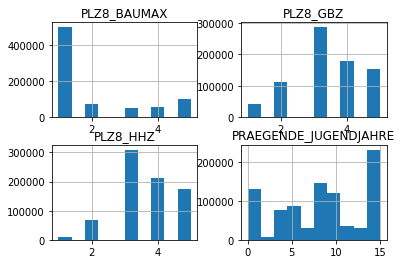

321


<Figure size 576x432 with 0 Axes>

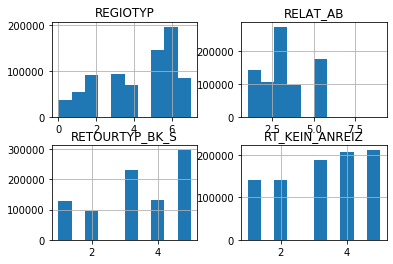

325


<Figure size 576x432 with 0 Axes>

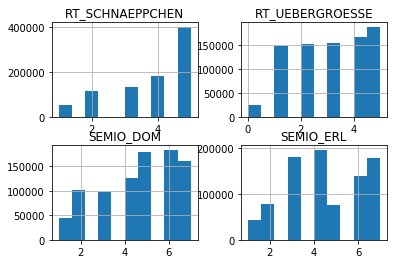

329


<Figure size 576x432 with 0 Axes>

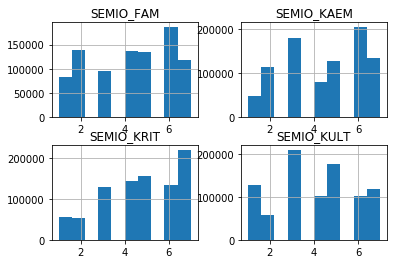

333


<Figure size 576x432 with 0 Axes>

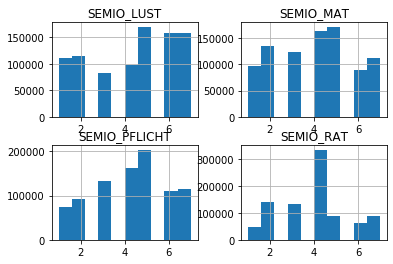

337


<Figure size 576x432 with 0 Axes>

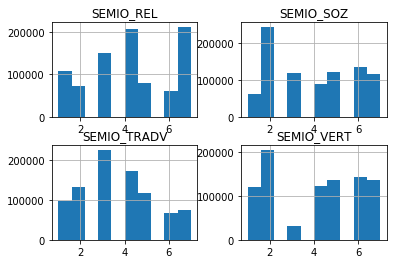

341


<Figure size 576x432 with 0 Axes>

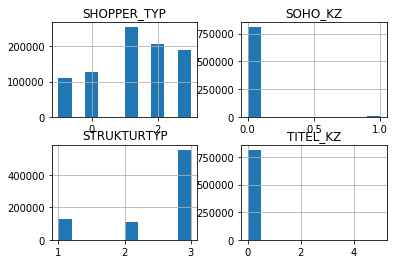

345


<Figure size 576x432 with 0 Axes>

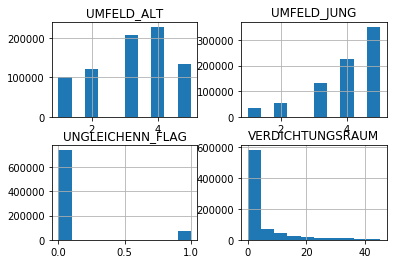

349


<Figure size 576x432 with 0 Axes>

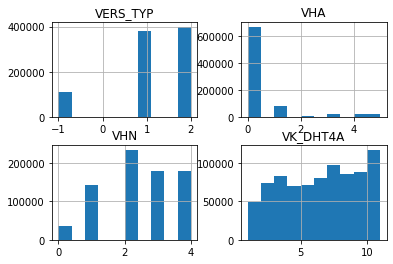

353


<Figure size 576x432 with 0 Axes>

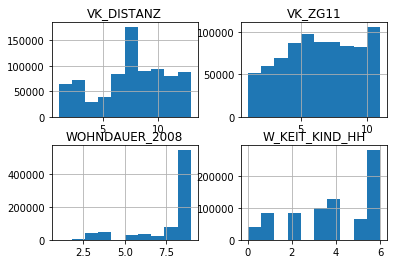

357


<Figure size 576x432 with 0 Axes>

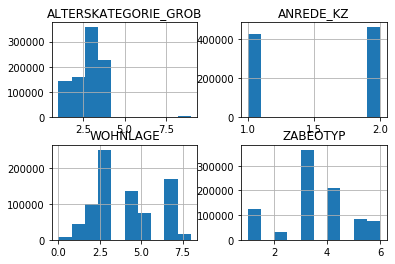

361


In [158]:
# draw distribution for every column
for i in range(1,365 ,4):
    try:
        draw_dsitribution(i)
        print(i)
    except:
        pass      

#### The prepocessing pipeline has been refactoring and save as function clean_data() in src/model_pipeline.py